In [1]:
#loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
;
#loading the data
df = pd.read_csv(r'C:\Users\nux\Documents\archive\insurance.csv') 

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
#basic information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#describing the data

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#check for duplicates

df.duplicated().sum()

1

In [7]:
#display the duplicate

# Create a Boolean mask for duplicates
is_duplicate = df.duplicated(keep=False)

# Filter the DataFrame to show the duplicate rows
duplicate_rows = df[is_duplicate]

# Count the number of duplicates
num_duplicates = is_duplicate.sum()
print("Number of Duplicates:", num_duplicates)

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)


Number of Duplicates: 2
Duplicate Rows:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [8]:
# Keep the first occurrence of duplicates

# Create a Boolean mask for duplicates, keeping the first occurrence
is_duplicate = df.duplicated(keep='first')

# Filter the DataFrame to show the duplicate rows
duplicate_rows = df[is_duplicate]

# Display the duplicate rows
print("Duplicate Rows (Keeping First Occurrence):")
print(duplicate_rows)

Duplicate Rows (Keeping First Occurrence):
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
#finding the null values in the data

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\nux\AppData\Local\Temp\ipykernel_4068\3095743385.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

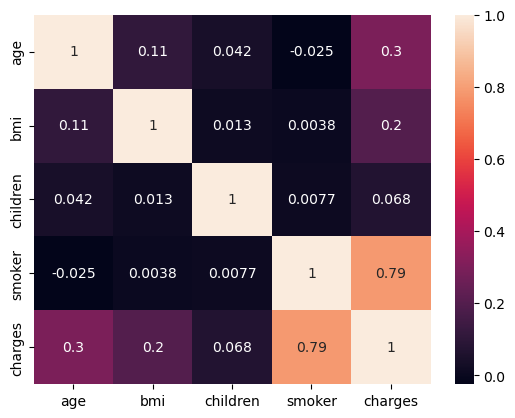

In [49]:
# plotting a correlation heatmap to check the relationships between charges and the other datasets
sns.heatmap(df.corr(),annot=True)


In [10]:
#find unique values
unique_numbers = df['region'].unique()
print("Unique region:", unique_numbers)


Unique region: ['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
#displaying smokers and non smokers
df.groupby(by=["smoker"]).mean()


C:\Users\nux\AppData\Local\Temp\ipykernel_4068\3445964436.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["smoker"]).mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [12]:
#devide the colums into groups where 0 will represent male and 1 female
# and 1 will represent yes and 0 no and the regions are replaced by number 1,2 & 3
d1 = {'male':0,'female':1}
d2 = {'yes':1,'no':0}
d3 = {'southwest':0,'southeast':1,'northwest':2,'northeast':3}


In [13]:
#map the values in a Pandas DataFrame column named 'sex' using a dictionary (d1) 
df['sex'] = df['sex'].map(d1)


In [14]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
5,31,1,25.740,0,no,southeast,3756.62160
6,46,1,33.440,1,no,southeast,8240.58960
7,37,1,27.740,3,no,northwest,7281.50560
8,37,0,29.830,2,no,northeast,6406.41070
9,60,1,25.840,0,no,northwest,28923.13692


In [15]:
#map the values in a Pandas DataFrame column named 'smoker' and region using a dictionary (d2) and (d3) 

df['smoker'] = df['smoker'].map(d2)
df['region'] = df['region'].map(d3) 


In [16]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,1,3756.62160
6,46,1,33.440,1,0,1,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,3,6406.41070
9,60,1,25.840,0,0,2,28923.13692


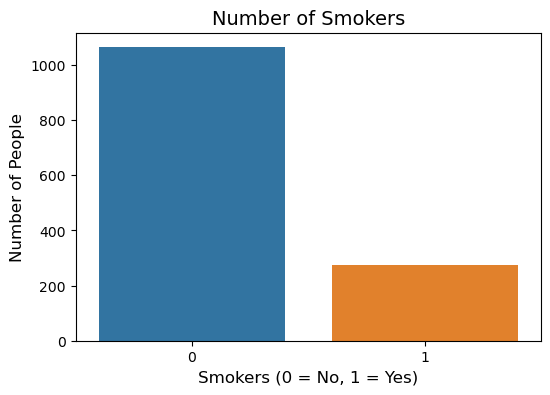

In [17]:
#ploting a bar graph to represent the number of smokers

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # Optional: Set the figure size

# Create a countplot using Seaborn
sns.countplot(data=df, x='smoker')

# Set labels and title
plt.xlabel('Smokers (0 = No, 1 = Yes)', fontsize=12)  # x-axis label
plt.ylabel('Number of People', fontsize=12)  #  y-axis label
plt.title('Number of Smokers', fontsize=14)  # Title for the plot

plt.show()

In [18]:
#divide ages int groups

age_bins=[17,26,38,50,64]
age_labels=['Young_adults','Middle_adults','Senior_adults','Old_adults']

#Create the 'Age_groups' column by assigning labels based on age ranges
df['Age_groups'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Display the DataFrame with age groups
print(df)


      age  sex     bmi  children  smoker  region      charges     Age_groups
0      19    1  27.900         0       1       0  16884.92400   Young_adults
1      18    0  33.770         1       0       1   1725.55230   Young_adults
2      28    0  33.000         3       0       1   4449.46200  Middle_adults
3      33    0  22.705         0       0       2  21984.47061  Middle_adults
4      32    0  28.880         0       0       2   3866.85520  Middle_adults
...   ...  ...     ...       ...     ...     ...          ...            ...
1333   50    0  30.970         3       0       2  10600.54830     Old_adults
1334   18    1  31.920         0       0       3   2205.98080   Young_adults
1335   18    1  36.850         0       0       1   1629.83350   Young_adults
1336   21    1  25.800         0       0       0   2007.94500   Young_adults
1337   61    1  29.070         0       1       2  29141.36030     Old_adults

[1338 rows x 8 columns]


In [19]:
#display the age groups 

df.groupby('Age_groups')['age'].mean()

Age_groups
Young_adults     20.699346
Middle_adults    31.358491
Senior_adults    43.650456
Old_adults       56.154270
Name: age, dtype: float64

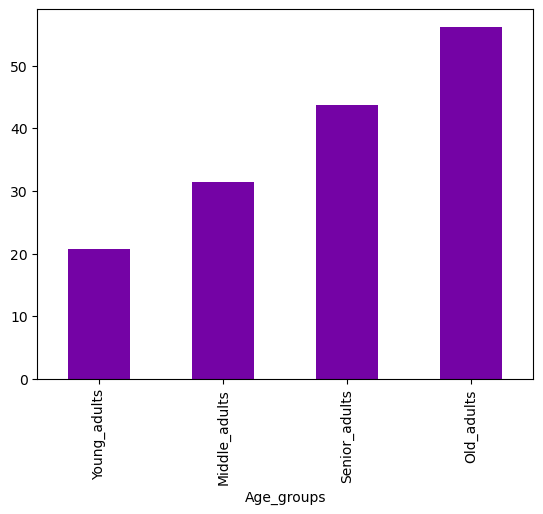

In [20]:
#find the age group that majority smokers belong to
df.groupby('Age_groups')['age'].mean().plot(kind='bar',color='#7403A5');

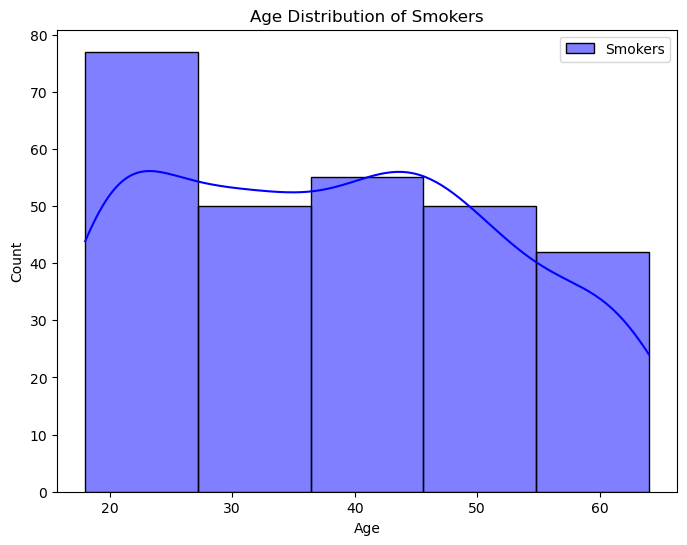

In [21]:
#ploting a histogram to represent the age group with majority smokers

plt.figure(figsize=(8, 6))
sns.histplot(df[df['smoker'] == 1]['age'], bins=5, kde=True, color='blue', label='Smokers')
plt.title('Age Distribution of Smokers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


In [22]:
### A majority of the smokers belong to the old_adults bracket and the young_adults are the least . 

In [23]:
#checking for region with the highest smokers

# Reverse mapping dictionary to map encoded values back to region names
d4 = {0: 'southwest', 1: 'southeast', 2: 'northwest', 3: 'northeast'}

# Apply the reverse mapping to 'region' column
df['region'] = df['region'].map(d4)

# Now, you can use groupby to count smokers by region and display the region names
df.groupby('region')['smoker'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: smoker, dtype: int64

In [24]:
# Create a new column 'smoker_status' to identify smokers and non-smokers
df['smoker_status'] = df['smoker'].map({1: 'Smoker', 0: 'Non-Smoker'})

# Display the DataFrame with the new 'smoker_status' column
print(df)


      age  sex     bmi  children  smoker     region      charges  \
0      19    1  27.900         0       1  southwest  16884.92400   
1      18    0  33.770         1       0  southeast   1725.55230   
2      28    0  33.000         3       0  southeast   4449.46200   
3      33    0  22.705         0       0  northwest  21984.47061   
4      32    0  28.880         0       0  northwest   3866.85520   
...   ...  ...     ...       ...     ...        ...          ...   
1333   50    0  30.970         3       0  northwest  10600.54830   
1334   18    1  31.920         0       0  northeast   2205.98080   
1335   18    1  36.850         0       0  southeast   1629.83350   
1336   21    1  25.800         0       0  southwest   2007.94500   
1337   61    1  29.070         0       1  northwest  29141.36030   

         Age_groups smoker_status  
0      Young_adults        Smoker  
1      Young_adults    Non-Smoker  
2     Middle_adults    Non-Smoker  
3     Middle_adults    Non-Smoker  
4  

In [30]:
# Group by 'region' and count the number of smokers in each region
smokers_by_region = df.groupby('region')['smoker'].sum()

# Group by 'region' and count the number of non-smokers in each region
non_smokers_by_region = (df.groupby('region')['smoker'].count() - smokers_by_region).astype(int)

# Create a DataFrame to store the counts
region_counts = pd.DataFrame({'Smokers': smokers_by_region, 'Non-Smokers': non_smokers_by_region})

# Display the list of all regions with the number of smokers and non-smokers
region_counts.index.name = 'Region'  # Set the index name to 'Region'
print(region_counts)


           Smokers  Non-Smokers
Region                         
northeast       67          257
northwest       58          267
southeast       91          273
southwest       58          267


In [31]:
### The southeast region has the highest number of smokers and still the highest number of non smokers.Both northwest and southwest have the same number of both smokers and non smokers 

In [32]:
#checking if there is a relationship between bmi and age

df.groupby('Age_groups')['bmi'].mean()

Age_groups
Young_adults     30.007353
Middle_adults    30.237704
Senior_adults    30.518723
Old_adults       31.580303
Name: bmi, dtype: float64

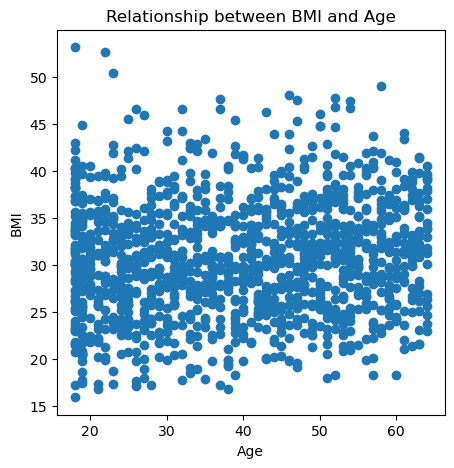

In [33]:
# A  Scatter plot to display the relationship between age and bmi

fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df.age,df.bmi)
ax.set(title='Relationship between BMI and Age',xlabel='Age',ylabel='BMI');

In [34]:
### Their is not that much of a relationship between age and bmi because their is a slight difference in their mean,older adults have a higher bmi compared to young adults

In [36]:
#checking the sex with the highest and lowest bmi

d5 ={0: 'male', 1: 'female'}


# Apply the reverse mapping to 'region' column
df['sex'] = df['sex'].map(d5)

df.groupby('sex')['bmi'].mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

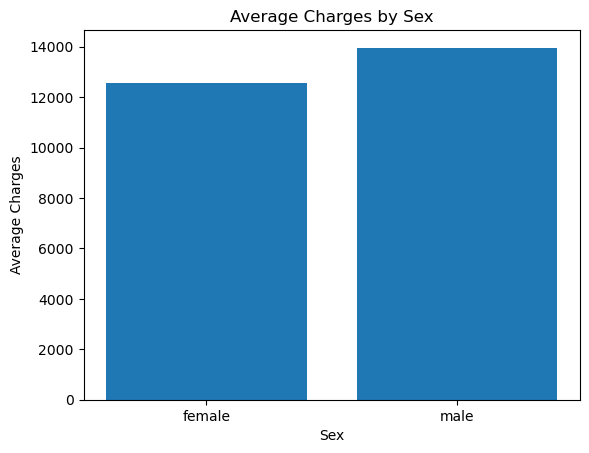

In [50]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'sex' and calculate the mean charges
mean_charges_by_sex = df.groupby('sex')['charges'].mean()

# Reset the index to make 'sex' a regular column
mean_charges_by_sex = mean_charges_by_sex.reset_index()

# Create a bar plot
plt.bar(mean_charges_by_sex['sex'], mean_charges_by_sex['charges'])
plt.xlabel('Sex')
plt.ylabel('Average Charges')
plt.title('Average Charges by Sex')
plt.show()


In [37]:
### Females and males have an almost same bmi, although the male's bmi is higher.

In [38]:
#Checking which age groups is charged the most
df.groupby('Age_groups')['charges'].mean()

Age_groups
Young_adults      9087.015807
Middle_adults    11221.111311
Senior_adults    13721.587264
Old_adults       17576.916994
Name: charges, dtype: float64

In [39]:
### The old adults are charged the most and the young adults the least

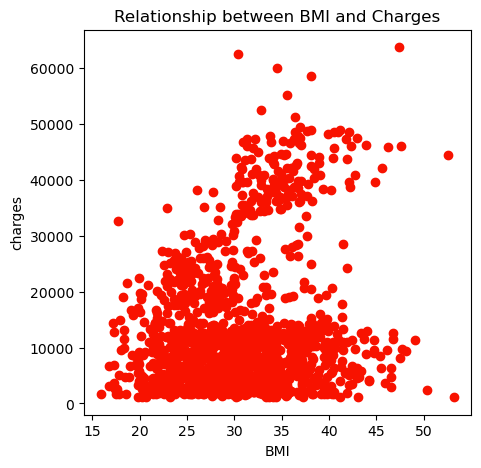

In [40]:
# plotting a scatter plot to display relationship between bmi and charges
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df.bmi,df.charges,color='#F81200')
ax.set(title='Relationship between BMI and Charges',xlabel='BMI',ylabel='charges');

In [41]:
##Group the bmi levels
bins=[15.96000,26.296249,30.399999,34.693749,53.130000]
label_names=['low','medium','moderate','high']
df['bmi_levels']=pd.cut(df['bmi'],bins,labels=label_names)

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Age_groups,smoker_status,bmi_levels
0,19,female,27.900,0,1,southwest,16884.92400,Young_adults,Smoker,medium
1,18,male,33.770,1,0,southeast,1725.55230,Young_adults,Non-Smoker,moderate
2,28,male,33.000,3,0,southeast,4449.46200,Middle_adults,Non-Smoker,moderate
3,33,male,22.705,0,0,northwest,21984.47061,Middle_adults,Non-Smoker,low
4,32,male,28.880,0,0,northwest,3866.85520,Middle_adults,Non-Smoker,medium


In [43]:
#checking the charges for each bmi level
df.groupby('bmi_levels')['bmi','charges'].mean()

C:\Users\nux\AppData\Local\Temp\ipykernel_4068\3837164603.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('bmi_levels')['bmi','charges'].mean()


,bmi,charges
bmi_levels,,
low,23.148548,10386.608533
medium,28.416607,11398.362224
moderate,32.439507,14323.550842
high,38.656970,16987.936691


In [44]:
### People with a higher bmi level are charged more compared to those with less 

In [46]:
#checking the level of bmi in smokers and non smokers
# Group by 'smoker_status' and 'bmi_levels', and calculate the mean BMI
bmi_by_smoker_status = df.groupby(['smoker_status', 'bmi_levels'])['bmi'].mean()

# Display the mean BMI for different 'bmi_levels' within each 'smoker_status' group
print("Mean BMI for Smokers and Non-Smokers by BMI Levels:")
print(bmi_by_smoker_status)


Mean BMI for Smokers and Non-Smokers by BMI Levels:
smoker_status  bmi_levels
Non-Smoker     low           23.178156
               medium        28.438731
               moderate      32.449617
               high          38.716744
Smoker         low           23.038873
               medium        28.325385
               moderate      32.394098
               high          38.456688
Name: bmi, dtype: float64


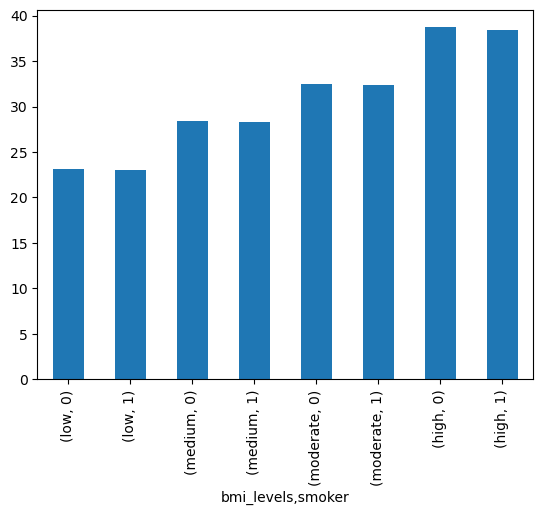

In [47]:
#Plot a bar graph comparing the bmi for smokers and non-smokers
df.groupby(['bmi_levels','smoker'])['bmi'].mean().plot(kind='bar');

In [48]:
### Both smokers and non-smokers have an almost same bmi but for non smoker the bml is slightly high

In [51]:
### Modelling With Linear Regression

In [52]:
#Import the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [55]:
#map out the dependant and independent variables
x=np.array(df.age).reshape((-1,1))
y=df.charges

In [56]:
#split the data into training and testing subsets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [57]:
#fitting the model
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

In [58]:
# getting the coefficient of determination,𝑅²,with score() method on model
pd.options.display.float_format='{:.2f}'.format
co_train='{:.2f}'.format(model.score(x_train,y_train))
co_test='{:.2f}'.format(model.score(x_test,y_test))
print(f'Training set score {co_train}')
print(f'Test set score {co_test}')

Training set score 0.08
Test set score 0.10


In [60]:
##The training set score is 0.08.
###This suggests that our linear regression model explains only 8% of the variance in 'charges' based on the 'age' feature
###the model has a weak ability to predict 'charges' using 'age' alone.
###The test set score is 0.10 which is  a relative low value
###The model explains only 10% of the variance in 'charges' when applied to the test set.

In [61]:
### This shows  that both scores suggest that 'age' alone may not be a strong predictor of 'charges' in our dataset.
###It's possible that other factors or features not included in this analysis play a more significant role in determining 'charges.

In [62]:
predicted=model.predict(x_test)
actual_vs_predicted=pd.DataFrame({'Actual':y_test,'Predicted':predicted})
actual_vs_predicted.head()

,Actual,Predicted
856,40974.16,15476.49
1294,11931.13,17948.61
1261,3277.16,10532.25
459,7682.67,13498.80
345,6184.30,12015.53


In [63]:
#Calaculating Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
#find the mean absolute error
MAE=mean_absolute_error(y_true=y_test,y_pred=predicted)
MAE

9072.019764656716

In [66]:
#Calculate the mean squared error
MSE=mean_squared_error(y_true=y_test,y_pred=predicted)
MSE

135836592.02950186

In [67]:
### Due to the trainig and test sets perfoming not well the mean absolute error,mean squared error and root mean squared error were really high meaning that the model does not fit well with the dataset.